# Import

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import os
import time
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import scipy.stats as stats

import seaborn as sns

from datetime import datetime

import re
import random

from tqdm.notebook import tqdm

import dask.dataframe as dd
from dask.distributed import LocalCluster, Client

sys.path.insert(0, 'tools/')

from tools import * 

# Starting Dask Cluster

In [2]:

cluster = LocalCluster()
client = Client(cluster)


In [3]:
cluster

LocalCluster(5b53d2e9, 'tcp://127.0.0.1:36659', workers=5, threads=20, memory=31.03 GiB)

In [4]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 5
Total threads: 20,Total memory: 31.03 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36659,Workers: 5
Dashboard: http://127.0.0.1:8787/status,Total threads: 20
Started: Just now,Total memory: 31.03 GiB
Comm: tcp://127.0.0.1:42585,Total threads: 4
Dashboard: http://127.0.0.1:36333/status,Memory: 6.21 GiB
Nanny: tcp://127.0.0.1:45221,


In [5]:
import ctypes

def trim_memory() -> int:
    libc = ctypes.CDLL("libc.so.6")
    return libc.malloc_trim(0)

client.run(trim_memory)

{'tcp://127.0.0.1:33231': 1,
 'tcp://127.0.0.1:34919': 1,
 'tcp://127.0.0.1:37319': 1,
 'tcp://127.0.0.1:41817': 1,
 'tcp://127.0.0.1:42585': 1}

# Reading data

In [6]:
config = pd.Series({
    'path': os.path.abspath('dades'),
    'file_type':'csv',
    'years':[2021, 2022, 2023],
    'dataset': 'BicingNou_INFORMACIO'
})

In [7]:
%%time

data = read_dask_dataframes(config.path, config.file_type, config.dataset, config.years)


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

CPU times: user 222 ms, sys: 53 ms, total: 275 ms
Wall time: 262 ms


# Droping not needed columns

2019

2020

2021

In [8]:
data[2021].head()

,station_id,name,physical_configuration,lat,lon,altitude,address,post_code,capacity,nearby_distance,cross_street,last_updated,ttl
0,1,"GRAN VIA CORTS CATALANES, 760",ELECTRICBIKESTATION,41.3979779,2.1801069,16,"GRAN VIA CORTS CATALANES, 760",8013,46,1000,NaN,1609455629,25
1,2,"C/ ROGER DE FLOR, 126",ELECTRICBIKESTATION,41.3954877,2.1771985,17,"C/ ROGER DE FLOR, 126",8013,27,1000,NaN,1609455629,25
2,3,"C/ NÀPOLS, 82",ELECTRICBIKESTATION,41.3941557,2.1813305,11,"C/ NÀPOLS, 82",8013,27,1000,NaN,1609455629,25
3,4,"C/ RIBES, 13",ELECTRICBIKESTATION,41.3933173,2.1812483,8,"C/ RIBES, 13",8013,21,1000,NaN,1609455629,25
4,5,"PG. LLUIS COMPANYS, 11 (ARC TRIOMF)",ELECTRICBIKESTATION,41.3911035,2.1801763,7,"PG. LLUIS COMPANYS, 11 (ARC TRIOMF)",8018,39,1000,NaN,1609455629,25


In [9]:
%%time

data[2021] = data[2021].drop(
    columns=['name', 'physical_configuration', 'altitude', 'address', 'post_code', 'capacity', 'last_updated', 'ttl', 'cross_street', 'nearby_distance']
).compute()


CPU times: user 4.01 s, sys: 1.43 s, total: 5.43 s
Wall time: 17 s


In [10]:
data[2021].columns

Index(['station_id', 'lat', 'lon'], dtype='object')

2022

In [11]:
data[2022].head()

,station_id,name,physical_configuration,lat,lon,altitude,address,post_code,capacity,nearby_distance,cross_street,last_updated,ttl,is_charging_station,x_ride_code_support
0,1,"GRAN VIA CORTS CATALANES, 760",ELECTRICBIKESTATION,41.3979779,2.1801069,16,"GRAN VIA CORTS CATALANES, 760",8013,46,1000,NaN,1643670016,15,NaN,NaN
1,2,"C/ ROGER DE FLOR, 126",ELECTRICBIKESTATION,41.3954877,2.1771985,17,"C/ ROGER DE FLOR, 126",8013,29,1000,NaN,1643670016,15,NaN,NaN
2,3,"C/ NÀPOLS, 82",ELECTRICBIKESTATION,41.3941557,2.1813305,11,"C/ NÀPOLS, 82",8013,27,1000,NaN,1643670016,15,NaN,NaN
3,4,"C/ RIBES, 13",ELECTRICBIKESTATION,41.3933173,2.1812483,8,"C/ RIBES, 13",8013,21,1000,NaN,1643670016,15,NaN,NaN
4,5,"PG. LLUIS COMPANYS, 11 (ARC TRIOMF)",ELECTRICBIKESTATION,41.3911035,2.1801763,7,"PG. LLUIS COMPANYS, 11 (ARC TRIOMF)",8018,39,1000,NaN,1643670016,15,NaN,NaN


In [12]:
%%time

data[2022] = data[2022].drop(
    columns=['name', 'physical_configuration', 'altitude', 'address', 'post_code', 'capacity', 'last_updated', 'ttl', 'cross_street', 'nearby_distance', 'is_charging_station', 'x_ride_code_support']
).compute()


CPU times: user 3.65 s, sys: 1.35 s, total: 5 s
Wall time: 16.9 s


In [13]:
data[2022].columns

Index(['station_id', 'lat', 'lon'], dtype='object')

2023

In [14]:
data[2023].head()

,station_id,name,physical_configuration,lat,lon,altitude,address,post_code,capacity,is_charging_station,nearby_distance,x_ride_code_support,cross_street,last_updated,ttl,rental_uris
0,1,"GRAN VIA CORTS CATALANES, 760",ELECTRICBIKESTATION,41.3979779,2.1801069,16,"GRAN VIA CORTS CATALANES, 760",8013,46,TRUE,1000,TRUE,NaN,1672527578,4,NaN
1,2,"C/ ROGER DE FLOR, 126",ELECTRICBIKESTATION,41.3954877,2.1771985,17,"C/ ROGER DE FLOR, 126",8013,29,TRUE,1000,TRUE,NaN,1672527578,4,NaN
2,3,"C/ NÀPOLS, 82",ELECTRICBIKESTATION,41.3941557,2.1813305,11,"C/ NÀPOLS, 82",8013,27,TRUE,1000,TRUE,NaN,1672527578,4,NaN
3,4,"C/ RIBES, 13",ELECTRICBIKESTATION,41.3933173,2.1812483,8,"C/ RIBES, 13",8013,21,TRUE,1000,TRUE,NaN,1672527578,4,NaN
4,5,"BERTO-PG. LLUIS COMPANYS, 11 (ARC TRIOMF)",ELECTRICBIKESTATION,41.3911035,2.1801763,7,"BERTO-PG. LLUIS COMPANYS, 11 (ARC TRIOMF)",8018,39,TRUE,1000,TRUE,NaN,1672527578,4,NaN


In [15]:
%%time

data[2023] = data[2023].drop(
    columns=['name', 'physical_configuration', 'altitude', 'address', 'post_code', 'capacity', 'last_updated', 'ttl', 'cross_street', 'nearby_distance', 'is_charging_station', 'x_ride_code_support', 'rental_uris']
).compute()


CPU times: user 1.01 s, sys: 336 ms, total: 1.35 s
Wall time: 4.81 s


In [16]:
data[2023].columns

Index(['station_id', 'lat', 'lon'], dtype='object')

In [18]:
%%time

for year in range(2021,2023+1):
    data[year] = data[year].groupby(['station_id', 'lon', 'lat']).size().reset_index(name=f'Count-{year}').sort_values([f'Count-{year}'], ascending=True)


CPU times: user 11 s, sys: 2.31 s, total: 13.3 s
Wall time: 12.4 s


# Merging data

In [122]:
result_data = data[2021]

for year in range(2022,2023+1):
    result_data = result_data.merge(data[year], on=['station_id','lon','lat'], how='outer')


In [123]:
result_data

,station_id,lon,lat,Count-2021,Count-2022,Count-2023
0,529,2.1193889,41.3477678,1.0,NaN,NaN
1,520,2.11948,41.3476951,1.0,2.0,NaN
2,115,2.1842851,41.3834235,14.0,NaN,NaN
3,52,2.177333,41.3811691,2534.0,NaN,NaN
4,513,2.124139,41.3989194,8185.0,NaN,NaN
...,...,...,...,...,...,...
549,255,2.185813,41.431509,NaN,NaN,763.0
550,520,9.150292,41.38622,NaN,NaN,4012.0
551,191,2.147474,41.381951,NaN,NaN,5655.0
552,255,2.18579,41.4315,NaN,NaN,8938.0


In [124]:
result_data = result_data.fillna(0)

In [125]:
result_data['Counts'] = result_data['Count-2021'] + result_data['Count-2022'] + result_data['Count-2023']

In [126]:

aux = result_data.groupby(['station_id']).size().reset_index(name=f'Count').sort_values([f'Count'], ascending=True)
target = aux[aux['Count']>1]['station_id'].values

In [127]:
aux = result_data[result_data.station_id.isin(target)].sort_values('station_id')
aux

,station_id,lon,lat,Count-2021,Count-2022,Count-2023,Counts
529,15,2.16890319787512,41.3916117009235,0.0,25222.0,24647.0,49869.0
518,15,2.168896,41.391659,0.0,10.0,0.0,10.0
180,15,2.1706023,41.3949085,104067.0,59247.0,0.0,163314.0
543,37,2.181903,41.381316,0.0,78993.0,24256.0,103249.0
100,37,2.1818962,41.381275,103952.0,7775.0,0.0,111727.0
...,...,...,...,...,...,...,...
18,513,2.124329,41.399017,95828.0,85123.0,24640.0,205591.0
4,513,2.124139,41.3989194,8185.0,0.0,0.0,8185.0
548,520,9,41.3476951,0.0,0.0,288.0,288.0
550,520,9.150292,41.38622,0.0,0.0,4012.0,4012.0


In [128]:
aux[aux.Counts < 40000]

,station_id,lon,lat,Count-2021,Count-2022,Count-2023,Counts
518,15,2.168896,41.391659,0.0,10.0,0.0,10.0
3,52,2.177333,41.3811691,2534.0,0.0,0.0,2534.0
524,61,2.16686709046997,41.3934793768574,0.0,8436.0,0.0,8436.0
522,82,2.1544348,41.3803263,0.0,4032.0,0.0,4032.0
2,115,2.1842851,41.3834235,14.0,0.0,0.0,14.0
551,191,2.147474,41.381951,0.0,0.0,5655.0,5655.0
5,241,2.1804804,41.4194205,17545.0,0.0,0.0,17545.0
552,255,2.18579,41.4315,0.0,0.0,8938.0,8938.0
549,255,2.185813,41.431509,0.0,0.0,763.0,763.0
523,262,2.1516048,41.3790976,0.0,4035.0,0.0,4035.0


In [129]:
result_data[result_data.station_id.isin(target) & (result_data.Counts < 40000)] = np.nan
result_data[result_data.station_id.isin(target) & (result_data['Count-2023'] == 0.)] = np.nan

result_data.dropna(inplace=True)

In [130]:
aux = result_data.groupby(['station_id']).size().reset_index(name=f'Count').sort_values([f'Count'], ascending=True)
target = aux[aux['Count']>1]['station_id'].values

In [131]:
aux = result_data[result_data.station_id.isin(target)].sort_values('station_id')
aux

,station_id,lon,lat,Count-2021,Count-2022,Count-2023,Counts


In [148]:
result_data

,station_id,lon,lat,Count-2021,Count-2022,Count-2023,Counts
0,529.0,2.1193889,41.3477678,1.0,0.0,0.0,1.0
6,464.0,2.182335,41.439692,28555.0,86840.0,24648.0,140043.0
7,115.0,2.184171,41.383597,37708.0,85820.0,24262.0,147790.0
9,66.0,2.1678388,41.3893222,73994.0,86892.0,24648.0,185534.0
11,211.0,2.1902116,41.3987543,80056.0,86776.0,24617.0,191449.0
...,...,...,...,...,...,...,...
543,37.0,2.181903,41.381316,0.0,78993.0,24256.0,103249.0
544,126.0,2.1822815,41.380628,0.0,79070.0,24612.0,103682.0
545,402.0,2.1821917,41.380628,0.0,79120.0,24612.0,103732.0
546,361.0,2.17881,41.37652,0.0,79141.0,24520.0,103661.0


# Print geo data

In [140]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [150]:
df = result_data[['station_id', 'lat', 'lon']]

In [151]:
crs = {'init':'epsg:4326'}

In [152]:
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]

In [153]:
geo_df = gpd.GeoDataFrame(df, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

/home/homeros/miniconda3/envs/rcnn/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,station_id,lat,lon,geometry
0,529.0,41.3477678,2.1193889,POINT (2.11939 41.34777)
6,464.0,41.439692,2.182335,POINT (2.18234 41.43969)
7,115.0,41.383597,2.184171,POINT (2.18417 41.38360)
9,66.0,41.3893222,2.1678388,POINT (2.16784 41.38932)
11,211.0,41.3987543,2.1902116,POINT (2.19021 41.39875)


In [154]:
# https://opendata-ajuntament.barcelona.cat/data/es/dataset/carrers-30-bcn
# https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
street_map = gpd.read_file('dades/CARRERS_30.geojson')

<Axes: >

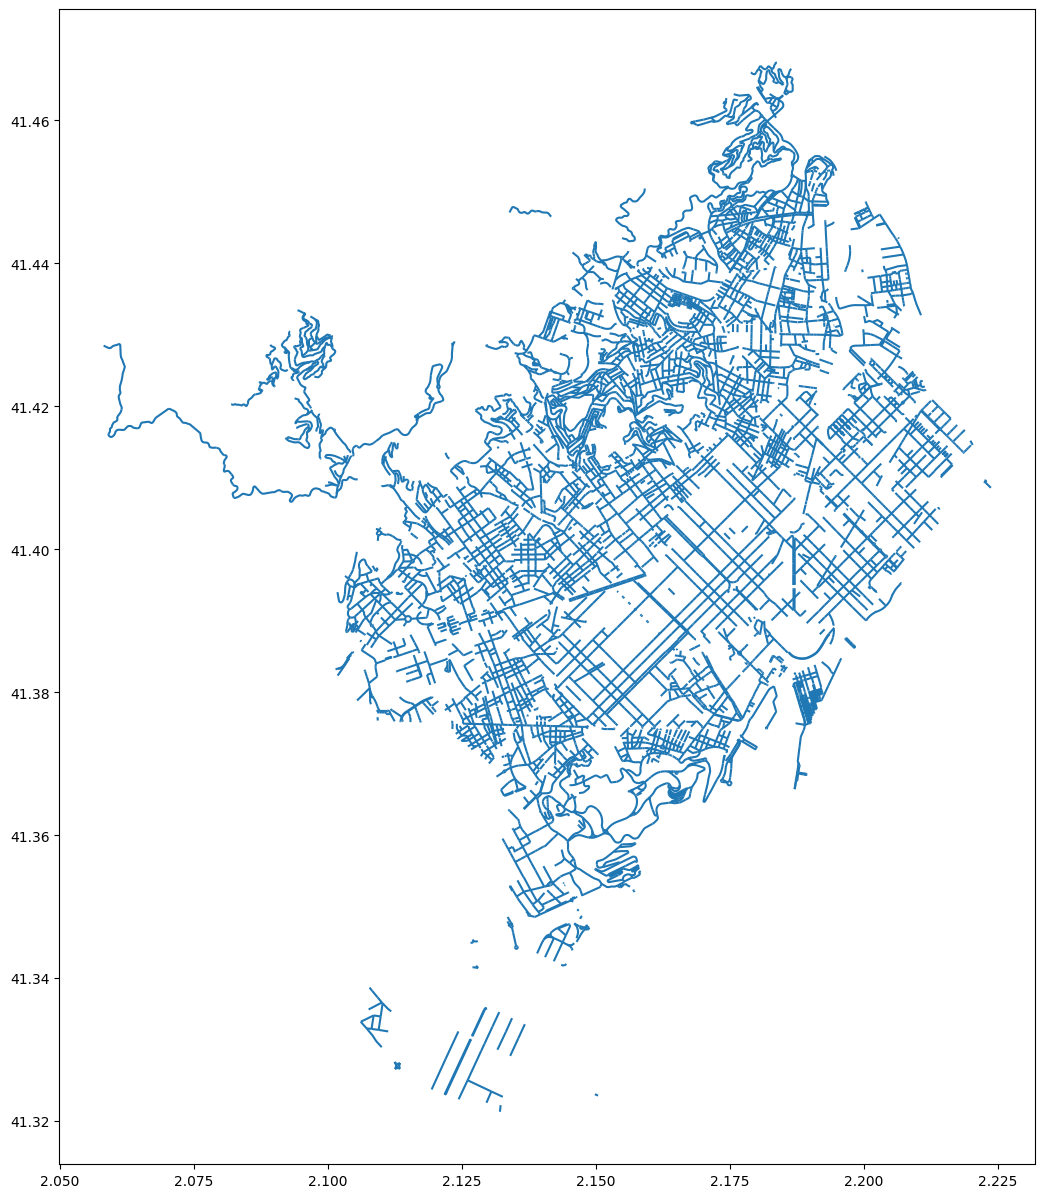

In [155]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax)

In [157]:
geo_df

,station_id,lat,lon,geometry
0,529.0,41.3477678,2.1193889,POINT (2.11939 41.34777)
6,464.0,41.439692,2.182335,POINT (2.18234 41.43969)
7,115.0,41.383597,2.184171,POINT (2.18417 41.38360)
9,66.0,41.3893222,2.1678388,POINT (2.16784 41.38932)
11,211.0,41.3987543,2.1902116,POINT (2.19021 41.39875)
...,...,...,...,...
543,37.0,41.381316,2.181903,POINT (2.18190 41.38132)
544,126.0,41.380628,2.1822815,POINT (2.18228 41.38063)
545,402.0,41.380628,2.1821917,POINT (2.18219 41.38063)
546,361.0,41.37652,2.17881,POINT (2.17881 41.37652)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


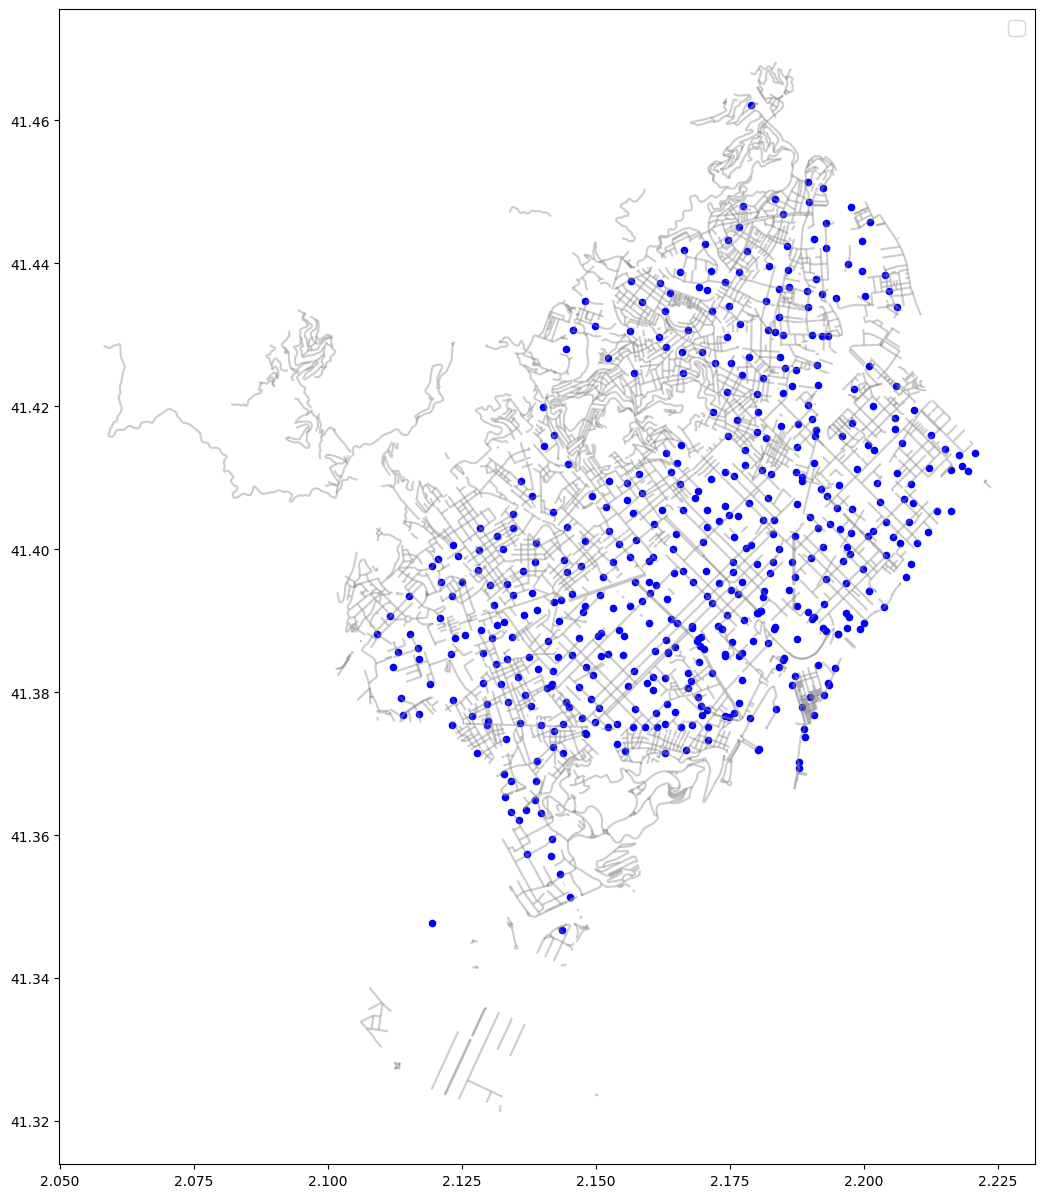

In [166]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df.head(480).plot(ax=ax, markersize=20, color='blue', marker='o')
#geo_df.iloc[0].plot(ax=ax, markersize=20, color='blue', marker='o', label='Neg')
#geo_df.iloc[1].plot(ax=ax, markersize=20, color='red', marker='^', label='Pos')
plt.legend(prop={'size':15})

# Save data to File

In [168]:
result_data.to_csv(f'dades/station_geoinformacio.csv', header=True, index_label='index')